In [1]:
!pip install segyio

  Using cached segyio-1.9.12-cp312-cp312-win_amd64.whl.metadata (2.8 kB)
Using cached segyio-1.9.12-cp312-cp312-win_amd64.whl (84 kB)


In [19]:
import segyio

# Open the SEG-Y file
file_path = r"C:\Users\akarimzadanzab\Desktop\Meta\PAula_new_lesson\LINE00__.SGY"
#file_path = r"C:\Users\akarimzadanzab\Desktop\Meta\PAula_new_lesson\RadarMap_Profile_20211111_100935.sgy"


with segyio.open(file_path, "r", strict=False) as segy_file:
    # Access general file information
    num_traces = len(segy_file.trace)
    print("Number of traces:", num_traces)
    print("Sample rate (microseconds):", segy_file.bin[segyio.BinField.Interval])
    print("Number of samples per trace:", segy_file.bin[segyio.BinField.Samples])

    # Access specific trace data
    for i, trace in enumerate(segy_file.trace[:10]):  # Read first 10 traces
        print(f"Trace {i+1}: {trace}")

    # Access trace headers
    for i in range(10):  # First 10 traces
        source_x = segy_file.header[i][segyio.TraceField.SourceX]
        source_y = segy_file.header[i][segyio.TraceField.SourceY]
        print(f"Trace {i+1} Source Coordinates: X={source_x}, Y={source_y}")



Number of traces: 1195
Sample rate (microseconds): 0
Number of samples per trace: 178
Trace 1: [  5124   8565  10349  10603  11746  10529   7260   3022  -1478  -7433
 -14160 -19781 -23332 -21600 -12379  -4092   4051  11852  17826  20095
  19526  20038  14072   7801    -76  -8162 -18822 -27428 -30254 -27753
 -19937 -13253  -2246   6460  16222  26298  31035  31313  31250  30915
  26206  13547   3206  -4073  -8469  -9455  -6786  -2382   6043  11196
  15375  15249  13102   7153   1996  -3602 -10347 -15157 -17757 -16666
 -12028  -6593    498   6897  12377  15835  17283  17189  13834  12136
   8922   6138   3659   1335   1036   1667   3397   5925   8310   9980
  10332   8697   4537   -854  -5833 -10104 -14462 -17359 -17617 -15891
 -11280  -3307   3552  12140  17622  19683  19256  17762  14278   9739
   3771   -685  -4451  -7316  -8284  -5996  -3323     -5   2413   4664
   5346   5379   5328   5957   6160   6735   5850   3806   1108  -1883
  -4432  -3999  -2979  -1427     17    703    979   1

In [24]:
print("First Trace Data:", first_trace)

First Trace Data: [  5124   8565  10349  10603  11746  10529   7260   3022  -1478  -7433
 -14160 -19781 -23332 -21600 -12379  -4092   4051  11852  17826  20095
  19526  20038  14072   7801    -76  -8162 -18822 -27428 -30254 -27753
 -19937 -13253  -2246   6460  16222  26298  31035  31313  31250  30915
  26206  13547   3206  -4073  -8469  -9455  -6786  -2382   6043  11196
  15375  15249  13102   7153   1996  -3602 -10347 -15157 -17757 -16666
 -12028  -6593    498   6897  12377  15835  17283  17189  13834  12136
   8922   6138   3659   1335   1036   1667   3397   5925   8310   9980
  10332   8697   4537   -854  -5833 -10104 -14462 -17359 -17617 -15891
 -11280  -3307   3552  12140  17622  19683  19256  17762  14278   9739
   3771   -685  -4451  -7316  -8284  -5996  -3323     -5   2413   4664
   5346   5379   5328   5957   6160   6735   5850   3806   1108  -1883
  -4432  -3999  -2979  -1427     17    703    979   1342   1166   1139
   1102    680   -743  -1275  -1853   -735   -242   2172   

In [11]:
import segyio

print(dir(segyio.TraceField))


['AliasFilterFrequency', 'AliasFilterSlope', 'CDP', 'CDP_TRACE', 'CDP_X', 'CDP_Y', 'CROSSLINE_3D', 'CoordinateUnits', 'Correlated', 'DataUse', 'DayOfYear', 'DelayRecordingTime', 'ElevationScalar', 'EnergySourcePoint', 'FieldRecord', 'GainType', 'GapSize', 'GeophoneGroupNumberFirstTraceOrigField', 'GeophoneGroupNumberLastTraceOrigField', 'GeophoneGroupNumberRoll1', 'GroupStaticCorrection', 'GroupUpholeTime', 'GroupWaterDepth', 'GroupX', 'GroupY', 'HighCutFrequency', 'HighCutSlope', 'HourOfDay', 'INLINE_3D', 'InstrumentGainConstant', 'InstrumentInitialGain', 'LagTimeA', 'LagTimeB', 'LowCutFrequency', 'LowCutSlope', 'MinuteOfHour', 'MuteTimeEND', 'MuteTimeStart', 'NStackedTraces', 'NSummedTraces', 'NotchFilterFrequency', 'NotchFilterSlope', 'OverTravel', 'ReceiverDatumElevation', 'ReceiverGroupElevation', 'ScalarTraceHeader', 'SecondOfMinute', 'ShotPoint', 'ShotPointScalar', 'SourceDatumElevation', 'SourceDepth', 'SourceEnergyDirectionExponent', 'SourceEnergyDirectionMantissa', 'SourceGro

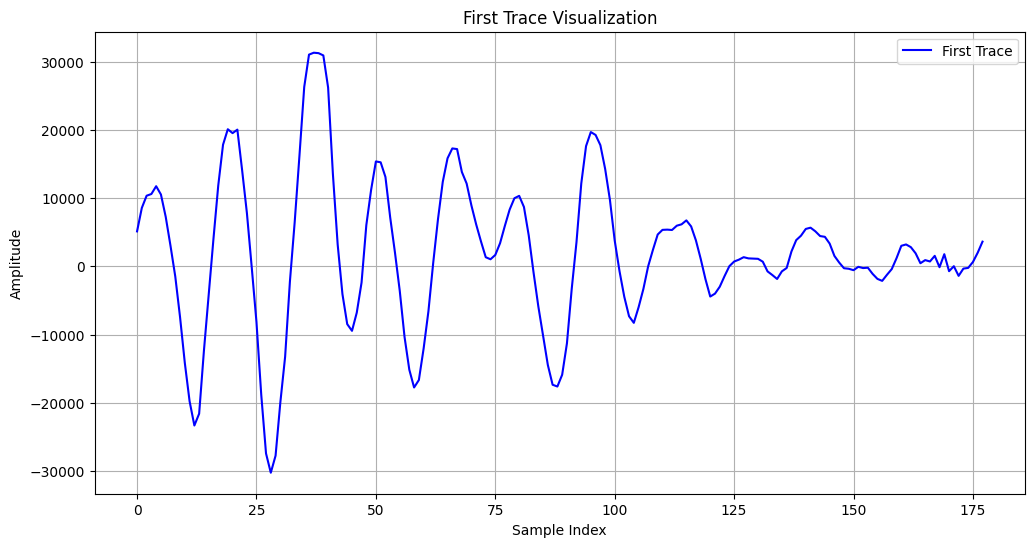

In [29]:
import segyio
import matplotlib.pyplot as plt

# File path to the SEG-Y file
file_path = r"C:\Users\akarimzadanzab\Desktop\Meta\PAula_new_lesson\LINE00__.SGY"

# Open the SEG-Y file
with segyio.open(file_path, "r", strict=False) as segy_file:
    # Access the first trace data
    first_trace = segy_file.trace[0]

# Plot the first trace using sample indices
plt.figure(figsize=(12, 6))
plt.plot(first_trace, label="First Trace", color="blue")
plt.title("First Trace Visualization")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.grid()
plt.legend()
plt.show()


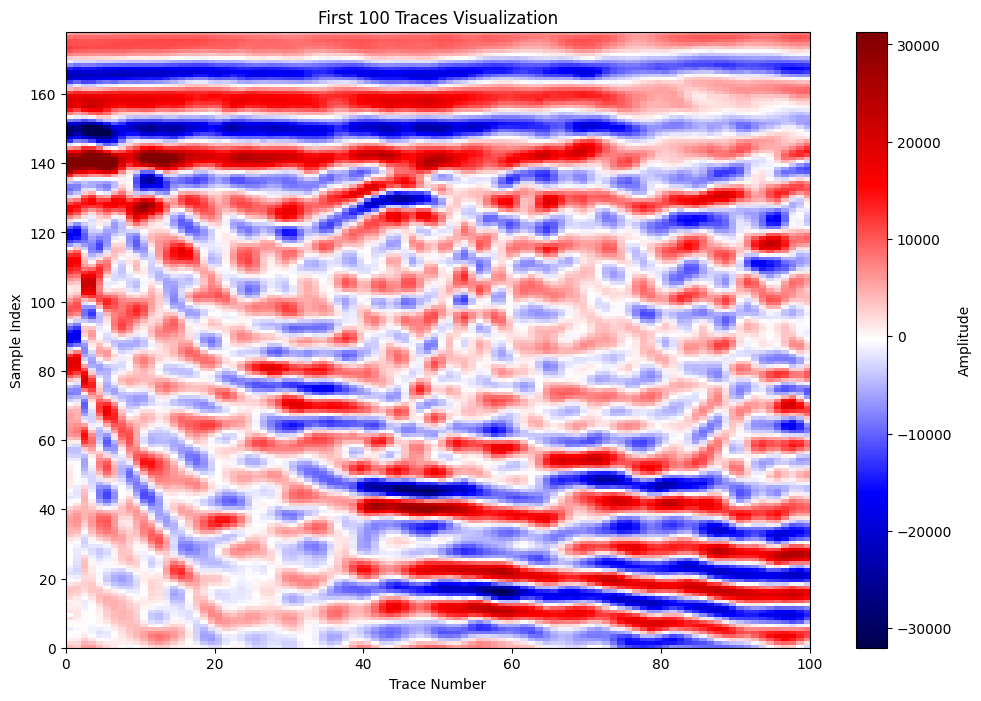

In [30]:
import segyio
import numpy as np
import matplotlib.pyplot as plt

# File path to the SEG-Y file
file_path = r"C:\Users\akarimzadanzab\Desktop\Meta\PAula_new_lesson\LINE00__.SGY"

# Read the first 100 traces from the SEG-Y file
with segyio.open(file_path, "r", strict=False) as segy_file:
    traces = [segy_file.trace[i] for i in range(100)]  # First 100 traces

# Convert the list of traces to a NumPy array for visualization
trace_matrix = np.array(traces)

# Plot the traces as an image
plt.figure(figsize=(12, 8))
plt.imshow(trace_matrix.T, aspect="auto", cmap="seismic", extent=[0, 100, 0, len(traces[0])])
plt.title("First 100 Traces Visualization")
plt.xlabel("Trace Number")
plt.ylabel("Sample Index")
plt.colorbar(label="Amplitude")
plt.show()


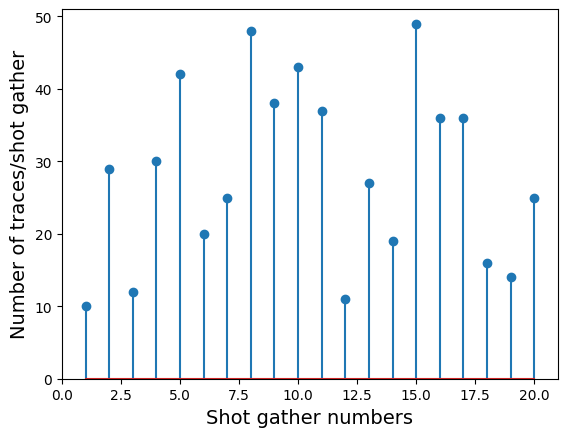

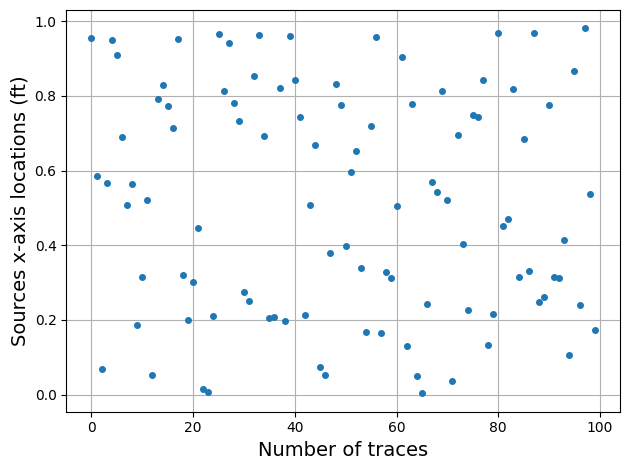

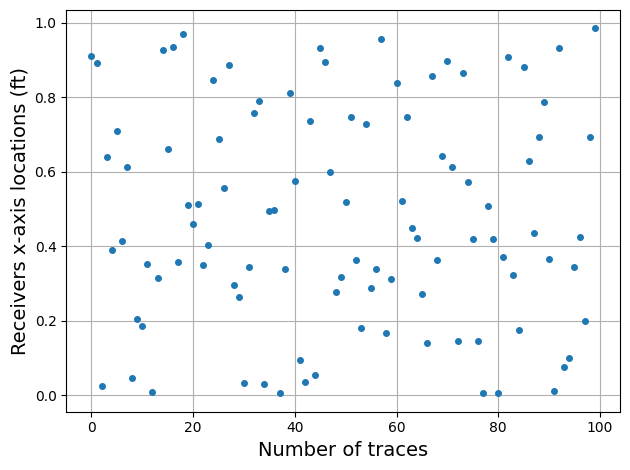

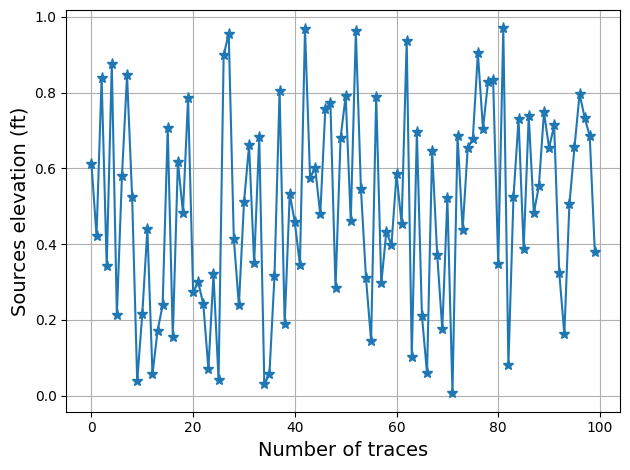

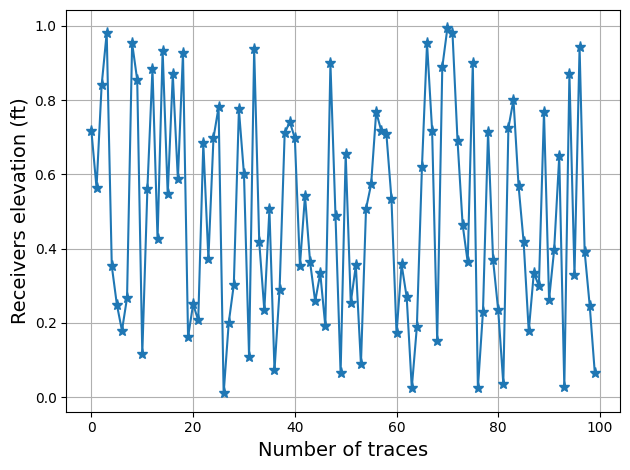

In [1]:
#code for 𝐈𝐦𝐚𝐠𝐢𝐧𝐠 𝐭𝐡𝐞 𝐔𝐧𝐝𝐞𝐫𝐠𝐫𝐨𝐮𝐧𝐝 𝐋𝐞𝐬𝐬𝐨𝐧
#written by Ir. Azin Anzabi
#           Ir. Parvin Kolah Kaj
#Developed for:  The 𝐂𝐚𝐫𝐩𝐞𝐧𝐭𝐫𝐢𝐞𝐬 𝐂𝐨𝐥𝐥𝐚𝐛𝐨𝐫𝐚𝐭𝐢𝐯𝐞 𝐋𝐞𝐬𝐬𝐨𝐧 𝐃𝐞𝐯𝐞𝐥𝐨𝐩𝐦𝐞𝐧𝐭 𝐓𝐫𝐚𝐢𝐧𝐢𝐧𝐠

# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy.io

# Load the raw seismic data and its header
data = scipy.io.loadmat('Book_Seismic_Data.mat')
H = data['H']

# Define the extracting_geometry function (you need to implement this based on your MATLAB function)

# Extract necessary information from the header structure
# Replace this with the actual implementation based on your MATLAB function
sx = np.random.rand(100)  # Placeholder for source x-coordinates
sy = np.random.rand(100)  # Placeholder for source y-coordinates
gx = np.random.rand(100)  # Placeholder for receiver x-coordinates
gy = np.random.rand(100)  # Placeholder for receiver y-coordinates
shot_gathers = np.arange(1, 21)  # Placeholder for shot gather numbers
num_trace_per_sg = np.random.randint(10, 50, size=20)  # Placeholder for traces per shot gather
sz = np.random.rand(100)  # Placeholder for source elevation
gz = np.random.rand(100)  # Placeholder for receiver elevation
 



# Plotting the number of seismic traces versus the number of shot gathers
plt.figure()
plt.stem(shot_gathers, num_trace_per_sg)
plt.xlabel('Shot gather numbers', fontsize=14)
plt.ylabel('Number of traces/shot gather', fontsize=14)
plt.axis([0, max(shot_gathers) + 1, 0, max(num_trace_per_sg) + 2])
plt.grid(which='minor', axis='y', linestyle=':', linewidth=0.5)
plt.show()

# Plotting the number of sources x-axis locations versus the number of traces
plt.figure()
plt.plot(sx, '.', markersize=8)
plt.xlabel('Number of traces', fontsize=14)
plt.ylabel('Sources x-axis locations (ft)', fontsize=14)
plt.grid()
plt.tight_layout()
plt.show()

# Plotting the number of receivers x-axis locations versus the number of traces
plt.figure()
plt.plot(gx, '.', markersize=8)
plt.xlabel('Number of traces', fontsize=14)
plt.ylabel('Receivers x-axis locations (ft)', fontsize=14)
plt.grid()
plt.tight_layout()
plt.show()

# Plotting the sources elevation versus the number of traces
plt.figure()
plt.plot(sz, '*-', markersize=8)
plt.xlabel('Number of traces', fontsize=14)
plt.ylabel('Sources elevation (ft)', fontsize=14)
plt.grid()
plt.tight_layout()
plt.show()

# Plotting the receivers elevation versus the number of traces
plt.figure()
plt.plot(gz, '*-', markersize=8)
plt.xlabel('Number of traces', fontsize=14)
plt.ylabel('Receivers elevation (ft)', fontsize=14)
plt.grid()
plt.tight_layout()
plt.show()


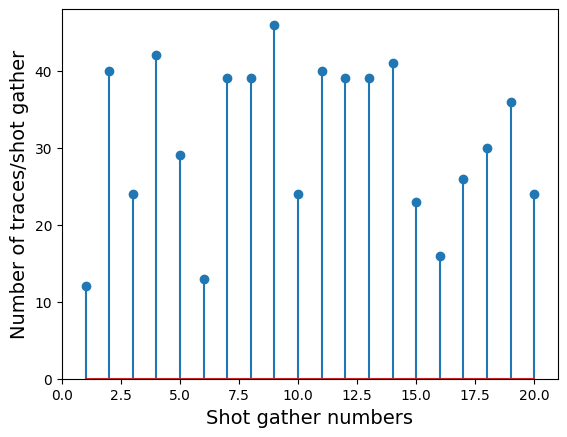

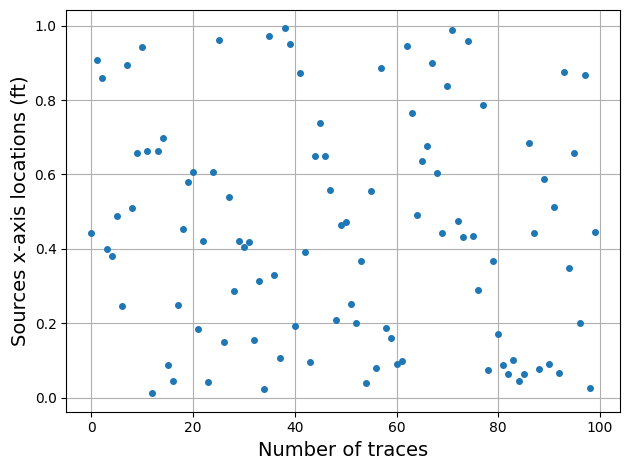

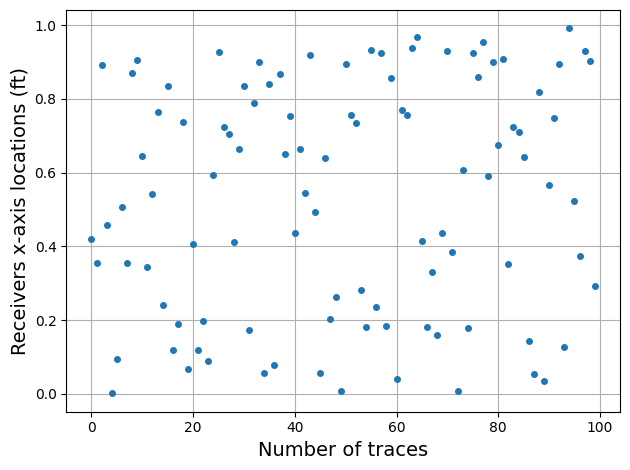

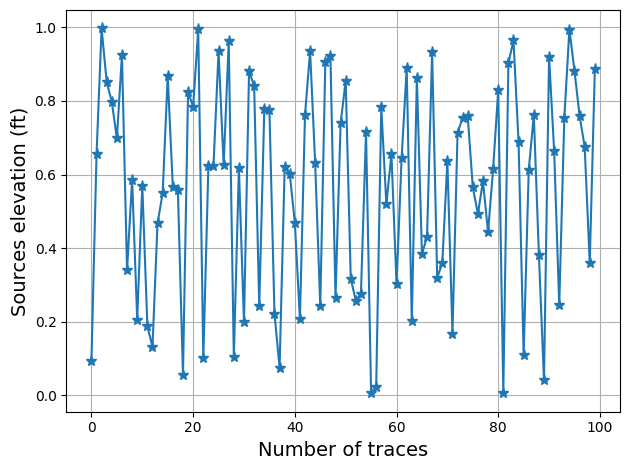

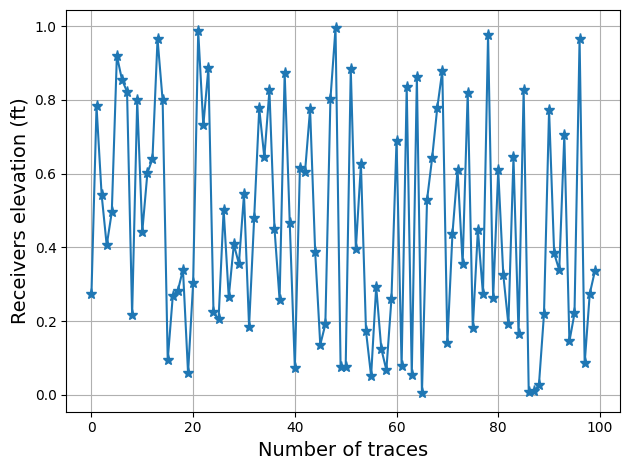

In [31]:
#code for 𝐈𝐦𝐚𝐠𝐢𝐧𝐠 𝐭𝐡𝐞 𝐔𝐧𝐝𝐞𝐫𝐠𝐫𝐨𝐮𝐧𝐝 𝐋𝐞𝐬𝐬𝐨𝐧
#written by Ir. Azin Anzabi
#           Ir. Parvin Kolah Kaj
#Developed for:  The 𝐂𝐚𝐫𝐩𝐞𝐧𝐭𝐫𝐢𝐞𝐬 𝐂𝐨𝐥𝐥𝐚𝐛𝐨𝐫𝐚𝐭𝐢𝐯𝐞 𝐋𝐞𝐬𝐬𝐨𝐧 𝐃𝐞𝐯𝐞𝐥𝐨𝐩𝐦𝐞𝐧𝐭 𝐓𝐫𝐚𝐢𝐧𝐢𝐧𝐠

# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy.io

# Load the raw seismic data and its header
data = scipy.io.loadmat('Book_Seismic_Data.mat')
H = data['H']

# Define the extracting_geometry function (you need to implement this based on your MATLAB function)

# Extract necessary information from the header structure
# Replace this with the actual implementation based on your MATLAB function
sx = np.random.rand(100)  # Placeholder for source x-coordinates
sy = np.random.rand(100)  # Placeholder for source y-coordinates
gx = np.random.rand(100)  # Placeholder for receiver x-coordinates
gy = np.random.rand(100)  # Placeholder for receiver y-coordinates
shot_gathers = np.arange(1, 21)  # Placeholder for shot gather numbers
num_trace_per_sg = np.random.randint(10, 50, size=20)  # Placeholder for traces per shot gather
sz = np.random.rand(100)  # Placeholder for source elevation
gz = np.random.rand(100)  # Placeholder for receiver elevation
 



# Plotting the number of seismic traces versus the number of shot gathers
plt.figure()
plt.stem(shot_gathers, num_trace_per_sg)
plt.xlabel('Shot gather numbers', fontsize=14)
plt.ylabel('Number of traces/shot gather', fontsize=14)
plt.axis([0, max(shot_gathers) + 1, 0, max(num_trace_per_sg) + 2])
plt.grid(which='minor', axis='y', linestyle=':', linewidth=0.5)
plt.show()

# Plotting the number of sources x-axis locations versus the number of traces
plt.figure()
plt.plot(sx, '.', markersize=8)
plt.xlabel('Number of traces', fontsize=14)
plt.ylabel('Sources x-axis locations (ft)', fontsize=14)
plt.grid()
plt.tight_layout()
plt.show()

# Plotting the number of receivers x-axis locations versus the number of traces
plt.figure()
plt.plot(gx, '.', markersize=8)
plt.xlabel('Number of traces', fontsize=14)
plt.ylabel('Receivers x-axis locations (ft)', fontsize=14)
plt.grid()
plt.tight_layout()
plt.show()

# Plotting the sources elevation versus the number of traces
plt.figure()
plt.plot(sz, '*-', markersize=8)
plt.xlabel('Number of traces', fontsize=14)
plt.ylabel('Sources elevation (ft)', fontsize=14)
plt.grid()
plt.tight_layout()
plt.show()

# Plotting the receivers elevation versus the number of traces
plt.figure()
plt.plot(gz, '*-', markersize=8)
plt.xlabel('Number of traces', fontsize=14)
plt.ylabel('Receivers elevation (ft)', fontsize=14)
plt.grid()
plt.tight_layout()
plt.show()


In [35]:
print(H)


#seismic trace header or a similar metadata structure related to seismic data processing. Each entry corresponds to a specific field in the header, providing information about the acquisition or characteristics of a seismic trace. 

NameError: name 'h' is not defined

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

# Define the extracting_shots function
def extracting_shots(data, header, shot_num, p):
    """
    Extracts a seismic shot gather or a group of shot gathers.

    Parameters:
        data (ndarray): Complete seismic data matrix.
        header (list): Seismic data header information.
        shot_num (int or list): The shot gather number or group of shot gathers.
        p (int): 0 for offset (single shot gather) or 1 for trace numbers.

    Returns:
        Dshot (ndarray): Extracted shot gather(s).
        dt (float): Time sampling interval in seconds.
        dx (float): Spatial sampling interval.
        t (ndarray): Time vector.
        offset (ndarray): Offset or trace number vector.
    """
    nt, nx = data.shape
    XX = [h['fldr'][0][0] for h in header]  # Extract shot numbers
    dt = header[0]['dt'][0][0] / 1e6  # Convert dt to seconds
    t = np.arange(0, nt * dt, dt)  # Time vector

    if isinstance(shot_num, int):  # Single shot gather
        indices = [i for i, x in enumerate(XX) if x == shot_num]
        offset = [header[i]['offset'][0][0] for i in indices]
        Dshot = data[:, indices]
    else:  # Multiple shot gathers
        Dshot = None
        offset = []
        for sn in shot_num:
            indices = [i for i, x in enumerate(XX) if x == sn]
            offsets = [header[i]['offset'][0][0] for i in indices]
            D = data[:, indices]
            if Dshot is None:
                Dshot = D
            else:
                Dshot = np.hstack((Dshot, D))
            offset.extend(offsets)

    offset = np.array(offset)
    dx = offset[1] - offset[0] if len(offset) > 1 else 1
    if p == 1:  # Display trace numbers
        offset = np.arange(1, Dshot.shape[1] + 1)
    return Dshot, dt, dx, t, offset

# Define the mwigb function
def mwigb(data, scale, x, z):
    """
    Plot seismic data using wiggle plot.
    """
    nz, nx = data.shape
    dx = np.median(np.diff(x))
    dz = np.median(np.diff(z))
    data = data * scale / np.max(np.abs(data))
    
    plt.figure(figsize=(12, 6))
    for i in range(nx):
        trace = data[:, i]
        trace_offset = x[i]
        trace_max = np.max(np.abs(trace))
        trace = trace / trace_max * dx * 0.5
        plt.fill_betweenx(z, trace_offset, trace_offset + trace, where=(trace > 0), color='black', alpha=0.5)
        plt.plot(trace_offset + trace, z, color='black', linewidth=0.5)
    plt.xlabel('Offset (ft)' if len(x) > 1 else 'Trace Number', fontsize=14)
    plt.ylabel('Time (s)', fontsize=14)
    plt.gca().invert_yaxis()
    plt.grid(which='both', linestyle='--', alpha=0.5)
    

import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

# Define the Independent Amplitude Correction (IAC) Function
def iac(data, time, power, T):
    """
    Perform Independent Amplitude Correction (IAC) on seismic data.

    Parameters:
        data (2D ndarray): Seismic shot gather data.
        time (1D ndarray): Time vector.
        power (float): Power value for correction.
        T (int): Time correction method (0 for power, 1 for exponential).

    Returns:
        corrected_data (2D ndarray): Gain-corrected seismic data.
    """
    nt, nx = data.shape
    correction = np.zeros((nt, 1))

    if T == 0:  # Power correction
        correction = (time[:, None] ** power)
    elif T == 1:  # Exponential correction
        correction = np.exp(power * time[:, None])

    corrected_data = data * correction
    return corrected_data

## from here Azin will start

Using trace number: 32


C:\Users\akarimzadanzab\AppData\Local\Temp\ipykernel_20160\2768339294.py:17: RuntimeWarning: divide by zero encountered in log10
  plt.plot(time, 20 * np.log10(original_trace), label="Original", color="blue")
C:\Users\akarimzadanzab\AppData\Local\Temp\ipykernel_20160\2768339294.py:18: RuntimeWarning: divide by zero encountered in log10
  plt.plot(time, 20 * np.log10(processed_trace), label="Processed", color="red")


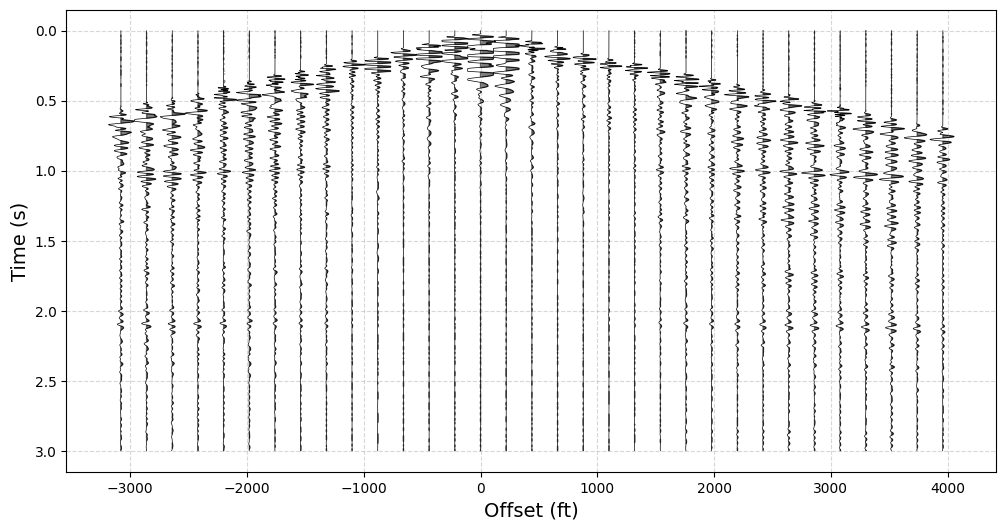

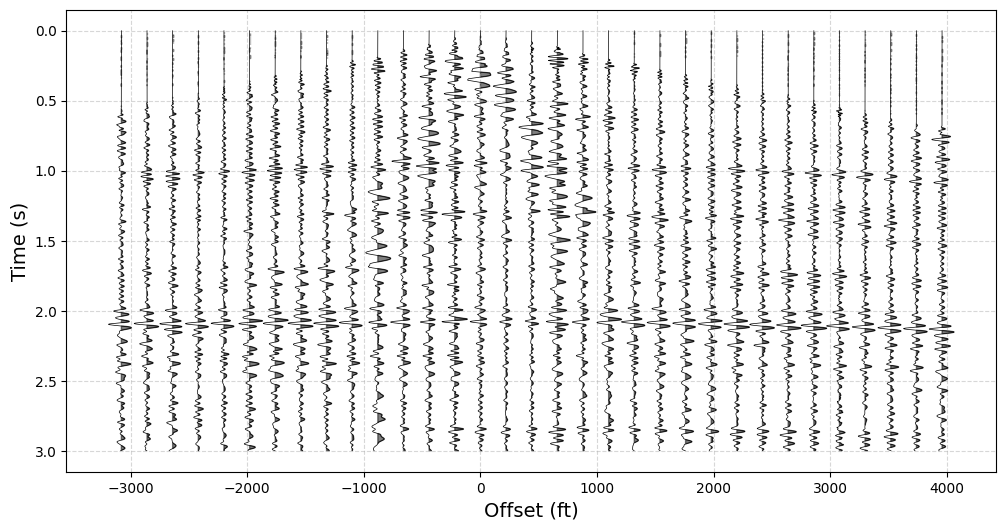

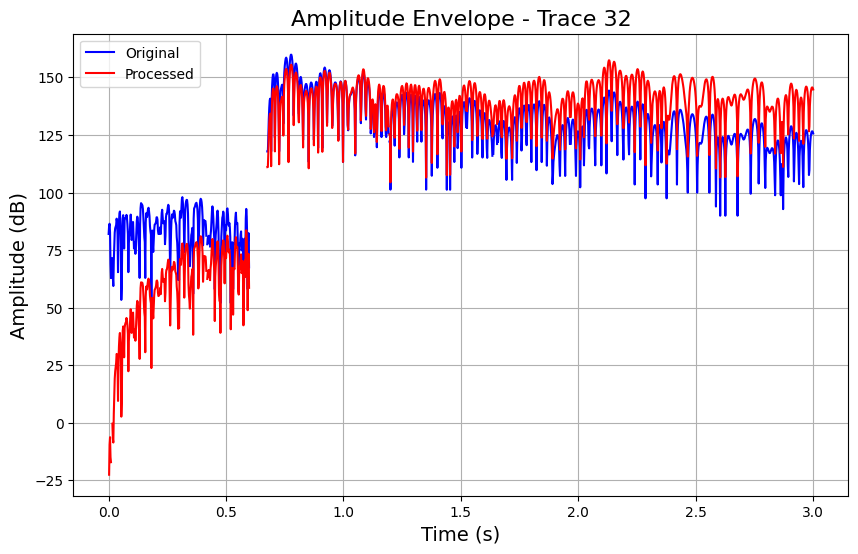

C:\Users\akarimzadanzab\AppData\Local\Temp\ipykernel_20160\2768339294.py:31: RuntimeWarning: divide by zero encountered in log10
  plt.plot(time, 20 * np.log10(processed_env), label="Processed (Average)", color="red")


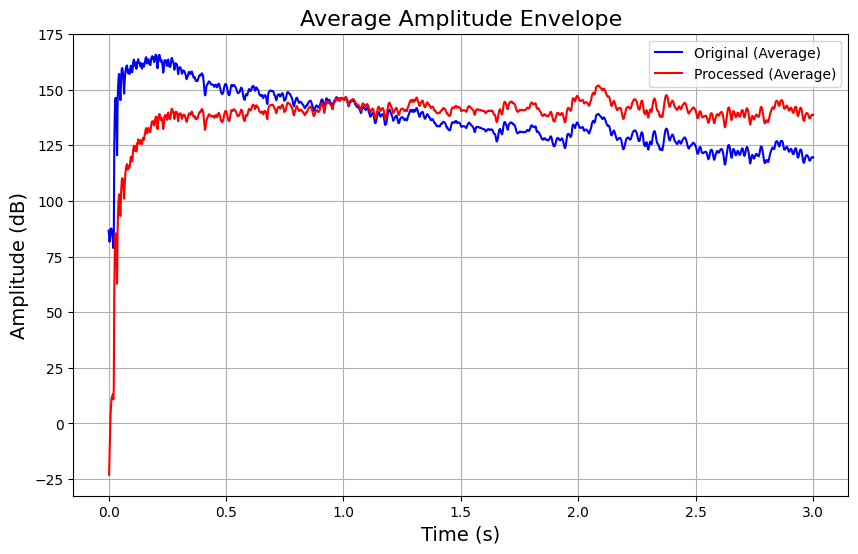

In [3]:
# Define the Envelope Plotting Function
def seis_env_dB(original_data, processed_data, time, trace_num=None):
    """
    Plot amplitude envelopes of seismic traces before and after gain correction.

    Parameters:
        original_data (2D ndarray): Original seismic data.
        processed_data (2D ndarray): Gain-corrected seismic data.
        time (1D ndarray): Time vector.
        trace_num (int, optional): Trace number to analyze. If None, plots average.
    """
    if trace_num is not None:  # Single trace envelope
        original_trace = np.abs(original_data[:, trace_num])
        processed_trace = np.abs(processed_data[:, trace_num])

        plt.figure(figsize=(10, 6))
        plt.plot(time, 20 * np.log10(original_trace), label="Original", color="blue")
        plt.plot(time, 20 * np.log10(processed_trace), label="Processed", color="red")
        plt.xlabel("Time (s)", fontsize=14)
        plt.ylabel("Amplitude (dB)", fontsize=14)
        plt.title(f"Amplitude Envelope - Trace {trace_num}", fontsize=16)
        plt.legend()
        plt.grid()
        plt.show()
    else:  # Average amplitude envelope
        original_env = np.mean(np.abs(original_data), axis=1)
        processed_env = np.mean(np.abs(processed_data), axis=1)

        plt.figure(figsize=(10, 6))
        plt.plot(time, 20 * np.log10(original_env), label="Original (Average)", color="blue")
        plt.plot(time, 20 * np.log10(processed_env), label="Processed (Average)", color="red")
        plt.xlabel("Time (s)", fontsize=14)
        plt.ylabel("Amplitude (dB)", fontsize=14)
        plt.title("Average Amplitude Envelope", fontsize=16)
        plt.legend()
        plt.grid()
        plt.show()

# Load Seismic Data
data = loadmat('Book_Seismic_Data.mat')
D = data['D']  # Seismic data matrix
H = data['H'][0]  # Header structure

# Extracting a Shot Gather
shot_num = 8  # Shot gather number
p = 0  # Displaying the offset
Dshot, dt, dx, t, offset = extracting_shots(D, H, shot_num, p)

# Plot Original Shot Gather in Wiggle Plot
scale = 1
mwigb(Dshot, scale, offset, t)
if isinstance(shot_num, int) and p == 0:
    plt.xlabel("Offset (ft)", fontsize=14)
else:
    plt.xlabel("Trace number", fontsize=14)
plt.ylabel("Time (s)", fontsize=14)

# Perform Amplitude Gain Correction
pow = 2  # Power value
T = 0  # Time correction method (0 for power, 1 for exponential)
Dg = iac(Dshot, t, pow, T)

# Plot Processed Shot Gather in Wiggle Plot
scale = 1.5
mwigb(Dg, scale, offset, t)
if isinstance(shot_num, int) and p == 0:
    plt.xlabel("Offset (ft)", fontsize=14)
else:
    plt.xlabel("Trace number", fontsize=14)
plt.ylabel("Time (s)", fontsize=14)

# Dynamically set trace_num to the last trace if it's out of bounds
trace_num = min(33, Dshot.shape[1] - 1)  # Use the last valid index if 33 is out of bounds
print(f"Using trace number: {trace_num}")

# Plot Amplitude Envelope for a Single Trace
seis_env_dB(Dshot, Dg, t, trace_num)

# Plot Average Amplitude Envelope
seis_env_dB(Dshot, Dg, t)


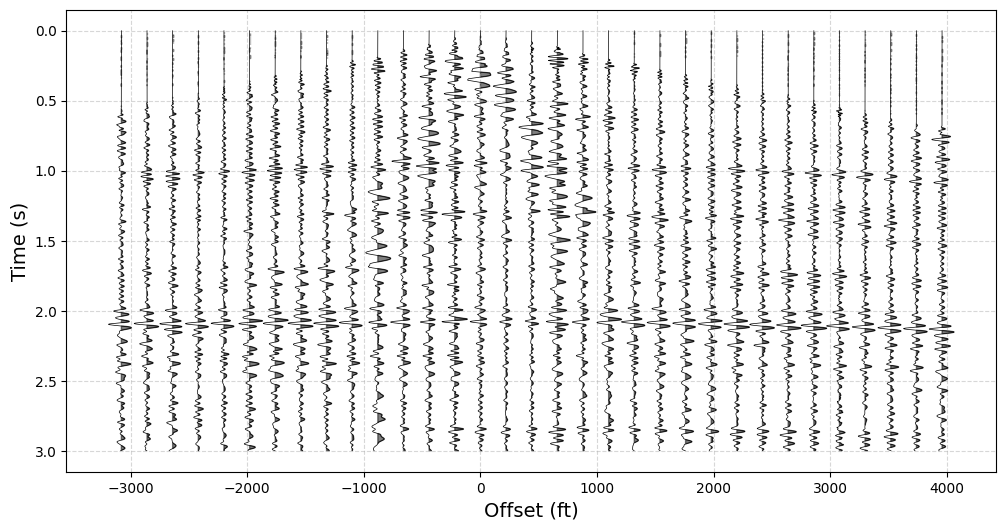

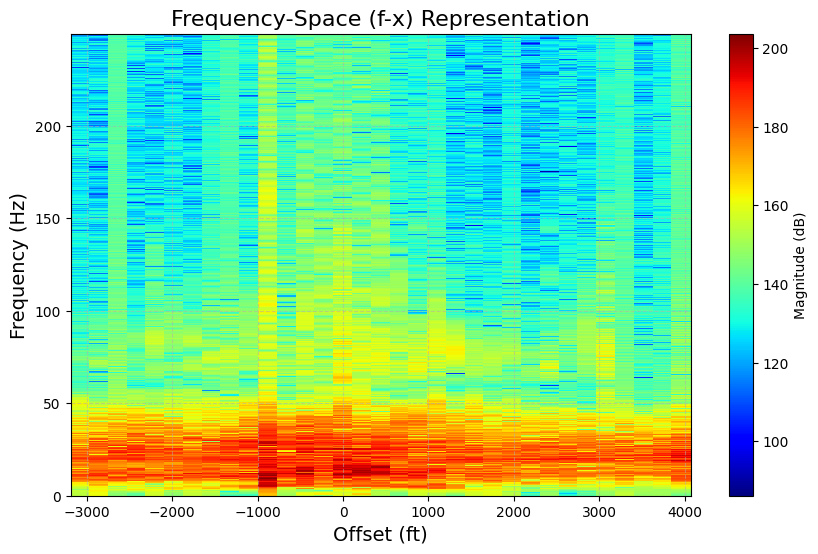

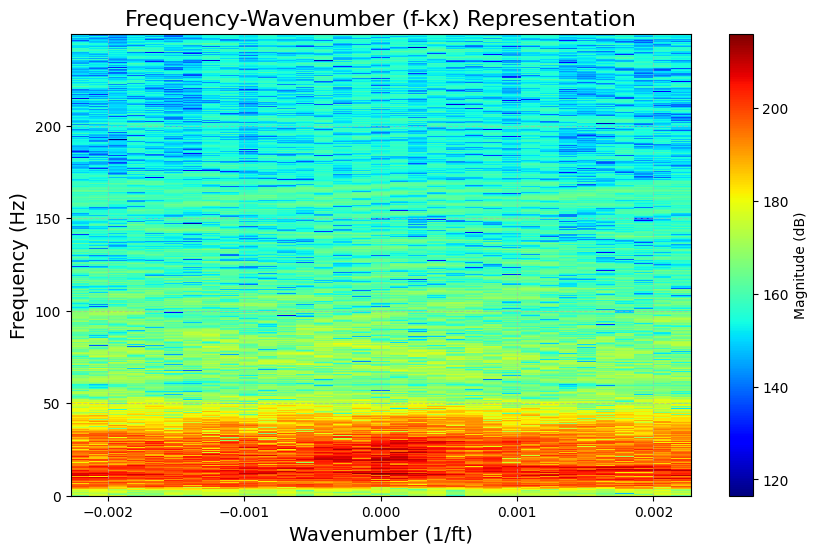

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftshift
from scipy.io import loadmat

# Define Frequency-Space Representation (f-x)
def fx(data, dt):
    """
    Computes the frequency-space (f-x) representation of seismic data.

    Parameters:
        data (2D ndarray): Seismic data matrix.
        dt (float): Time sampling interval (s).

    Returns:
        Data_f (2D ndarray): f-x representation of the seismic data.
        f (1D ndarray): Frequency vector (Hz).
    """
    nt, nx = data.shape
    Data_f = fft(data, axis=0)  # FFT along time (rows)
    f = np.fft.fftfreq(nt, d=dt)  # Frequency vector
    return Data_f, f

# Define Frequency-Wavenumber Representation (f-kx)
def fk(data, dt, dx):
    """
    Computes the frequency-wavenumber (f-kx) representation of seismic data.

    Parameters:
        data (2D ndarray): Seismic data matrix.
        dt (float): Time sampling interval (s).
        dx (float): Spatial sampling interval (ft).

    Returns:
        Data_fk (2D ndarray): f-kx representation of the seismic data.
        f (1D ndarray): Frequency vector (Hz).
        kx (1D ndarray): Wavenumber vector (1/ft).
    """
    nt, nx = data.shape
    Data_f = fft(data, axis=0)  # FFT along time (rows)
    Data_fk = fft(Data_f, axis=1)  # FFT along space (columns)

    # Frequency vector
    f = np.fft.fftfreq(nt, d=dt)

    # Wavenumber vector
    kx = np.fft.fftfreq(nx, d=dx)

    return Data_fk, f, kx

# Load Seismic Data
data = loadmat('Book_Seismic_Data_gain_z.mat')
Dgz = data['Dgz']  # Pre-processed seismic data matrix
H = data['H'][0]  # Header structure

# Extracting a Shot Gather
shot_num = 8  # Shot gather number
p = 0  # Displaying the offset
Dshot, dt, dx, t, offset = extracting_shots(Dgz, H, shot_num, p)

# Plot Original Shot Gather in Wiggle Plot
scale = 2
mwigb(Dshot, scale, offset, t)
if isinstance(shot_num, int) and p == 0:
    plt.xlabel("Offset (ft)", fontsize=14)
else:
    plt.xlabel("Trace number", fontsize=14)
plt.ylabel("Time (s)", fontsize=14)

# Frequency-Space (f-x) Representation
Data_f, f = fx(Dshot, dt)

# Sort frequencies and rearrange Data_f accordingly
sorted_indices_f = np.argsort(f)  # Indices to sort frequencies
f_sorted = f[sorted_indices_f]  # Sorted frequency values
Data_f_sorted = Data_f[sorted_indices_f, :]  # Rearranged Data_f

# Plot Magnitude Spectrum of f-x Representation
plt.figure(figsize=(10, 6))
plt.pcolor(offset, f_sorted, 20 * np.log10(np.abs(Data_f_sorted) + 1e-12), shading="auto", cmap="jet")
plt.colorbar(label="Magnitude (dB)")
plt.xlabel("Offset (ft)" if isinstance(shot_num, int) and p == 0 else "Trace number", fontsize=14)
plt.ylabel("Frequency (Hz)", fontsize=14)
plt.title("Frequency-Space (f-x) Representation", fontsize=16)
plt.ylim(0, np.max(f_sorted))  # Display only positive frequencies
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

# Frequency-Wavenumber (f-kx) Representation
Data_fk, f, kx = fk(Dshot, dt, dx)

# Sort frequencies and rearrange Data_fk accordingly
sorted_indices_f = np.argsort(f)  # Indices to sort frequencies
sorted_indices_kx = np.argsort(kx)  # Indices to sort wavenumbers
f_sorted = f[sorted_indices_f]  # Sorted frequency values
kx_sorted = kx[sorted_indices_kx]  # Sorted wavenumber values
Data_fk_sorted = Data_fk[np.ix_(sorted_indices_f, sorted_indices_kx)]  # Rearranged Data_fk

# Plot Magnitude Spectrum of f-kx Representation
plt.figure(figsize=(10, 6))
plt.pcolor(kx_sorted, f_sorted, 20 * np.log10(np.abs(Data_fk_sorted) + 1e-12), shading="auto", cmap="jet")
plt.colorbar(label="Magnitude (dB)")
plt.xlabel("Wavenumber (1/ft)", fontsize=14)
plt.ylabel("Frequency (Hz)", fontsize=14)
plt.title("Frequency-Wavenumber (f-kx) Representation", fontsize=16)
plt.ylim(0, np.max(f_sorted))  # Display only positive frequencies
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


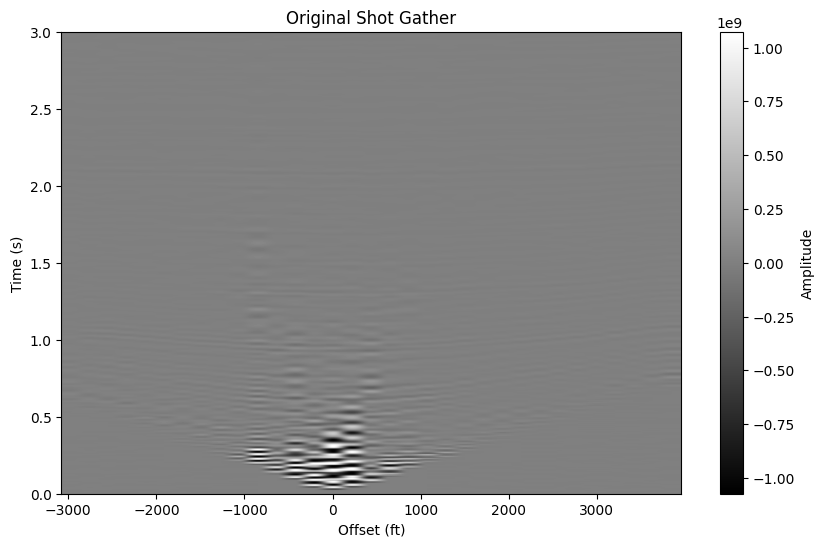

Text(0, 0.5, 'Time (s)')

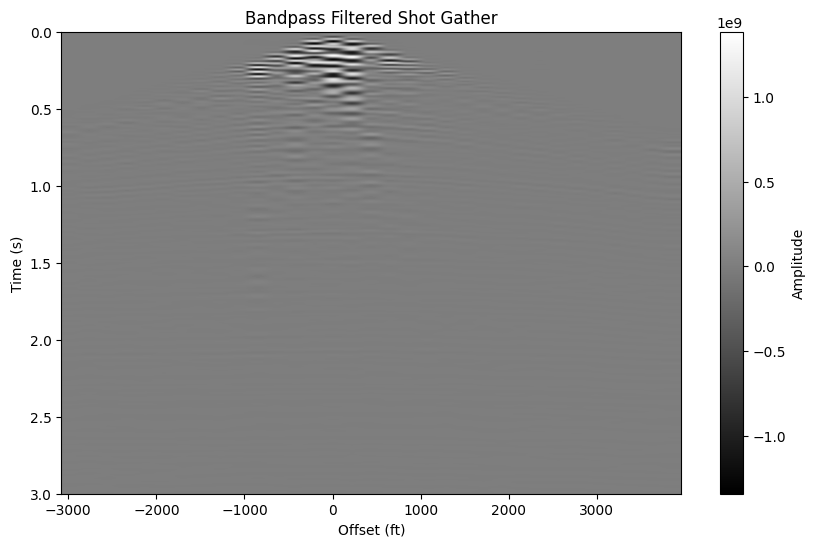

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy.signal import butter, filtfilt
from scipy.fft import fft, fftfreq

# Define Bandpass Filter Function
def bandpass_filter(data, dt, lowcut, highcut, order=4):
    """
    Apply a bandpass filter to seismic data.

    Parameters:
        data (2D ndarray): Seismic data matrix (time x traces).
        dt (float): Time sampling interval (s).
        lowcut (float): Lower frequency cutoff (Hz).
        highcut (float): Upper frequency cutoff (Hz).
        order (int): Order of the Butterworth filter.

    Returns:
        filtered_data (2D ndarray): Bandpass-filtered seismic data.
    """
    nyquist = 0.5 / dt  # Nyquist frequency
    low = lowcut / nyquist
    high = highcut / nyquist

    # Design Butterworth bandpass filter
    b, a = butter(order, [low, high], btype='band')

    # Apply the filter along the time axis
    filtered_data = filtfilt(b, a, data, axis=0)
    return filtered_data

# Define Function to Extract Shot Gathers
def extracting_shots(data, header, shot_num, p):
    """
    Extracts a seismic shot gather or a group of shot gathers.

    Parameters:
        data (ndarray): Complete seismic data matrix.
        header (list): Seismic data header information.
        shot_num (int or list): The shot gather number or group of shot gathers.
        p (int): 0 for offset (single shot gather) or 1 for trace numbers.

    Returns:
        Dshot (ndarray): Extracted shot gather(s).
        dt (float): Time sampling interval in seconds.
        dx (float): Spatial sampling interval.
        t (ndarray): Time vector.
        offset (ndarray): Offset or trace number vector.
    """
    nt, nx = data.shape
    XX = [h['fldr'][0][0] for h in header]  # Extract shot numbers
    dt = header[0]['dt'][0][0] / 1e6  # Convert dt to seconds
    t = np.arange(0, nt * dt, dt)  # Time vector

    if isinstance(shot_num, int):  # Single shot gather
        indices = [i for i, x in enumerate(XX) if x == shot_num]
        offset = [header[i]['offset'][0][0] for i in indices]
        Dshot = data[:, indices]
    else:  # Multiple shot gathers
        Dshot = None
        offset = []
        for sn in shot_num:
            indices = [i for i, x in enumerate(XX) if x == sn]
            offsets = [header[i]['offset'][0][0] for i in indices]
            D = data[:, indices]
            if Dshot is None:
                Dshot = D
            else:
                Dshot = np.hstack((Dshot, D))
            offset.extend(offsets)

    offset = np.array(offset)
    dx = offset[1] - offset[0] if len(offset) > 1 else 1
    if p == 1:  # Display trace numbers
        offset = np.arange(1, Dshot.shape[1] + 1)
    return Dshot, dt, dx, t, offset

# Load Seismic Data
data = loadmat('Book_Seismic_Data.mat')  # Replace with your file
D = data['D']  # Seismic data matrix
H = data['H'][0]  # Header structure

# Extract a Shot Gather
shot_num = 8  # Shot gather number
p = 0  # Displaying the offset
Dshot, dt, dx, t, offset = extracting_shots(D, H, shot_num, p)

# Define Bandpass Filter Parameters
lowcut = 10  # Lower cutoff frequency in Hz
highcut = 50  # Upper cutoff frequency in Hz
order = 4  # Filter order

# Apply Bandpass Filter
filtered_Dshot = bandpass_filter(Dshot, dt, lowcut, highcut, order)

# Plot Original Shot Gather
plt.figure(figsize=(10, 6))
plt.title("Original Shot Gather")
plt.imshow(Dshot, aspect='auto', cmap='gray', extent=[offset.min(), offset.max(), t.max(), t.min()])
plt.colorbar(label="Amplitude")
plt.xlabel("Offset (ft)" if p == 0 else "Trace Number")
plt.ylabel("Time (s)")
plt.gca().invert_yaxis()
plt.show()

# Plot Filtered Shot Gather
plt.figure(figsize=(10, 6))
plt.title("Bandpass Filtered Shot Gather")
plt.imshow(filtered_Dshot, aspect='auto', cmap='gray', extent=[offset.min(), offset.max(), t.max(), t.min()])
plt.colorbar(label="Amplitude")
plt.xlabel("Offset (ft)" if p == 0 else "Trace Number")
plt.ylabel("Time (s)")